In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import File

In [5]:
print(os.getcwd())
os.chdir('./data')

/Users/User/Documents/Python/wrangle


In [7]:
print(os.getcwd())
print(os.listdir())

/Users/User/Documents/Python/wrangle/data
['311-service-requests.csv']


In [14]:
complaints = pd.read_csv('311-service-requests.csv', dtype='unicode')
    # specify dtype to save memory (guess type is memory demanding)
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [15]:
complaints.dtypes

Unique Key                        object
Created Date                      object
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution Action Updated Date    object
Community Board                   object
Borough                           object
X Coordinate (St

## Cleaning column names

In [36]:
class clean_name:
    # constructor
    def __init__(self, trim = True, lower_case = True, space_to = '_'):
        self.trim = trim
        self.lower_case = lower_case    
        self.space_to = space_to 
    
    # cleaning process:
    def clean(self, cols):
        clean_cols = []
        for col in cols:
            if self.trim:
                col = self._trim(col)
            if self.lower_case:
                col = self._lower_case(col)
            if self.space_to is not None:
                col = self._space_to(col, self.space_to)
        
            clean_cols.append(col)
        return clean_cols
    
    
    # strip space
    @staticmethod
    def _trim(s):
        return s.strip()
        
    # lower case
    @staticmethod
    def _lower_case(s):
        return s.lower()
    
    # replace space with underscore
    @staticmethod
    def _space_to(s,replacer):
        return s.replace(' ', replacer)
    
col_cleaner = clean_name()

In [19]:
cols = list(complaints.columns)
cols[:5]

['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name']

In [37]:
clean_cols = col_cleaner.clean(cols)
clean_cols

['unique_key',
 'created_date',
 'closed_date',
 'agency',
 'agency_name',
 'complaint_type',
 'descriptor',
 'location_type',
 'incident_zip',
 'incident_address',
 'street_name',
 'cross_street_1',
 'cross_street_2',
 'intersection_street_1',
 'intersection_street_2',
 'address_type',
 'city',
 'landmark',
 'facility_type',
 'status',
 'due_date',
 'resolution_action_updated_date',
 'community_board',
 'borough',
 'x_coordinate_(state_plane)',
 'y_coordinate_(state_plane)',
 'park_facility_name',
 'park_borough',
 'school_name',
 'school_number',
 'school_region',
 'school_code',
 'school_phone_number',
 'school_address',
 'school_city',
 'school_state',
 'school_zip',
 'school_not_found',
 'school_or_citywide_complaint',
 'vehicle_type',
 'taxi_company_borough',
 'taxi_pick_up_location',
 'bridge_highway_name',
 'bridge_highway_direction',
 'road_ramp',
 'bridge_highway_segment',
 'garage_lot_name',
 'ferry_direction',
 'ferry_terminal_name',
 'latitude',
 'longitude',
 'location']

In [38]:
complaints.columns = clean_cols
complaints.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,garage_lot_name,ferry_direction,ferry_terminal_name,latitude,longitude,location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


## Most common type of complaints

In [44]:
comp_counts = complaints['complaint_type'].value_counts()
comp_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: complaint_type, dtype: int64

<AxesSubplot:>

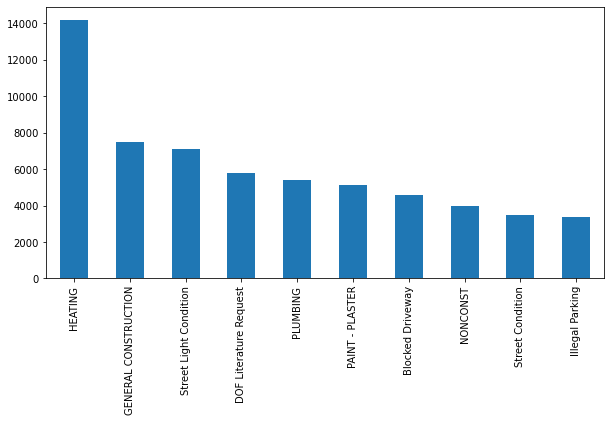

In [53]:
comp_counts[:10].plot(kind='bar',figsize=(10,5))

HEATING issue is complaint the most with 14200 times

## Noise complaint

In [54]:
complaints['complaint_type'].unique()

array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Rodent', 'Blocked Driveway',
       'Noise - House of Worship', 'Street Light Condition',
       'Harboring Bees/Wasps', 'Taxi Complaint', 'Homeless Encampment',
       'Traffic Signal Condition', 'Food Establishment', 'Noise - Park',
       'Broken Muni Meter', 'Benefit Card Replacement',
       'Sanitation Condition', 'ELECTRIC', 'PLUMBING', 'HEATING',
       'GENERAL CONSTRUCTION', 'Street Condition', 'Consumer Complaint',
       'Derelict Vehicles', 'Noise', 'Drinking', 'Indoor Air Quality',
       'Panhandling', 'Derelict Vehicle', 'Lead', 'Water System',
       'Noise - Helicopter', 'Homeless Person Assistance',
       'Root/Sewer/Sidewalk Condition', 'Sidewalk Condition', 'Graffiti',
       'DOF Literature Request', 'Animal in a Park',
       'Overgrown Tree/Branches', 'Air Quality', 'Dirty Conditions',
       'Water Quality', 'Other Enforcement', 'Collection Truck Noise',
     